In [73]:
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [74]:
def traverse_datasets(hdf5_file):

    """Traverse all datasets across all groups in HDF5 file."""

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = '{}/{}'.format(prefix, key)
            if isinstance(item, h5py.Dataset):  # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group):  # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    with h5py.File(hdf5_file, 'r') as f:
        print("Filename: ", f)
        print("Timestamp: ", f.attrs["OS_time"])
        for (path, dset) in h5py_dataset_iterator(f):
            print(path, dset)

    return None

In [75]:
#Check Current Working Directory (cwd)
path = '/Volumes/FAT/image_data/image_data/'
files = os.listdir(path)
print("Files in : ", path)
print()
for filename in files:
    if filename.endswith(".hdf5"):
    #Open the test file in Current Working Directory
        traverse_datasets(os.path.join(path,filename))
        print()
        print(os.stat(os.path.join(path,filename)).st_size, "bytes \n") #344200 bytes = 0.3442 Megabyte

Files in :  /Volumes/FAT/image_data/image_data/

Filename:  <HDF5 file "Capture0.hdf5" (mode r)>
Timestamp:  13:39
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture1.hdf5" (mode r)>
Timestamp:  13:39
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture2.hdf5" (mode r)>
Timestamp:  13:39
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file

336240 bytes 

Filename:  <HDF5 file "Capture49.hdf5" (mode r)>
Timestamp:  13:47
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture50.hdf5" (mode r)>
Timestamp:  13:48
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture51.hdf5" (mode r)>
Timestamp:  13:48
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture52.hdf5" (mode r)>
Tim

Timestamp:  13:56
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture94.hdf5" (mode r)>
Timestamp:  13:56
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture95.hdf5" (mode r)>
Timestamp:  13:56
/image1 <HDF5 dataset "image1": shape (256, 320), type "<u2">
/image2 <HDF5 dataset "image2": shape (256, 320), type "<u2">
/temp1 <HDF5 dataset "temp1": shape (), type "<f8">
/temp2 <HDF5 dataset "temp2": shape (), type "<f8">

336240 bytes 

Filename:  <HDF5 file "Capture96.hdf5" (mode r)>
Timestamp:  13:56
/image1 <HDF5 dataset "image1": shape (256, 320),

In [112]:
def create_df(path, files):
    """
    this script converts hdf5 files in path to a pandas df
    requires filepath to .h5 data and filename
    returns df object
    """
    ims1  = []
    ims2  = []
    t1s   = []
    t2s   = []
    times = []
        
    for f in files:
        filename = os.path.join(path, f)
        #open hdf5 files
        fn = h5py.File(filename, "r")
        times.append(fn.attrs["OS_time"])
        ims1.append(fn['image1'][()])
        ims2.append(fn['image2'][()])
        t1s.append(fn['temp1'][()])
        t2s.append(fn['temp2'][()])
        
    return [times,ims1,ims2,t1s,t2s]

In [113]:
[times,ims1,ims2,t1s,t2s] = create_df(path,files)

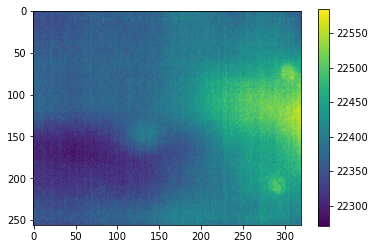

In [115]:
plt.imshow(ims2[20])
plt.colorbar()
plt.show()

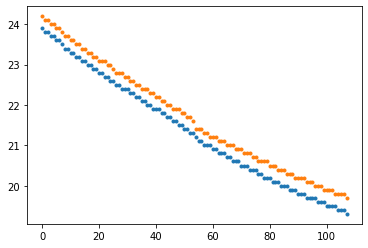

In [117]:
plt.plot(t1s,'.')
plt.plot(t2s,'.')

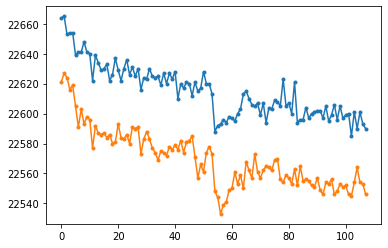

In [145]:
plt.plot( np.asarray(ims1)[:,150,150],'.-')
plt.plot( np.asarray(ims1)[:,180,150],'.-')
plt.show()

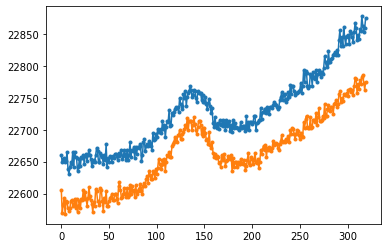

In [158]:
plt.plot( np.asarray(ims1)[1,120,:],'.-')
plt.plot( np.asarray(ims1)[60,120,:],'.-')
plt.show()